In [13]:
import wisardpkg as wp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [ ]:
MNIST = fetch_openml('mnist_784', version=1, as_frame=False)

X = MNIST.data
y = MNIST.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

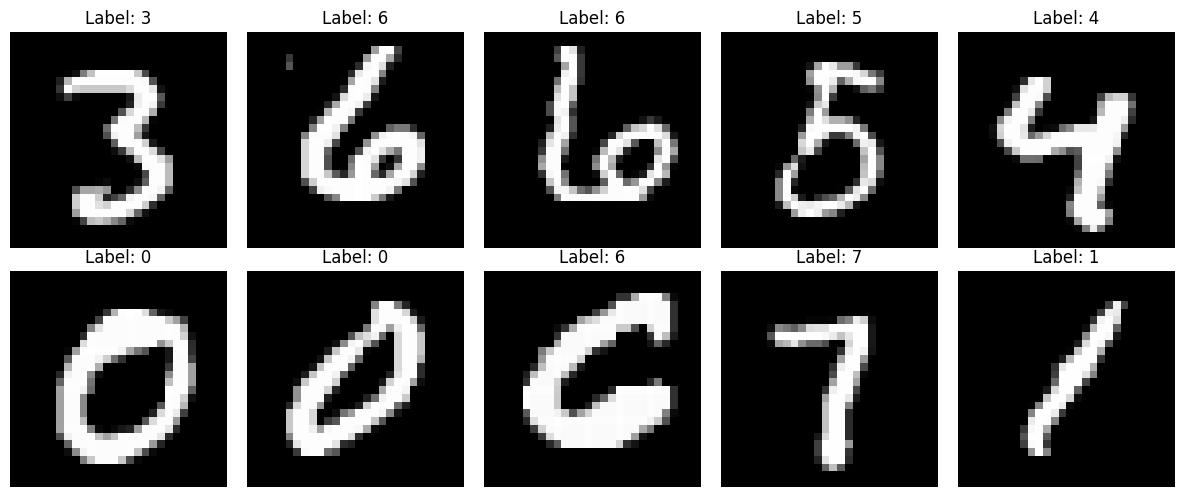

In [ ]:
indices = np.random.choice(len(X), 10, replace=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, idx in zip(axes.flatten(), indices):
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()



In [16]:
kc = wp.KernelCanvas(784, 10, bitsByKernel=3, activationDegree=0.07, useDirection=False)

In [17]:
type(X[0])

numpy.ndarray

In [18]:
X_reshaped = X.reshape(-1, 28, 28)
X_reshaped[0].shape


(28, 28)

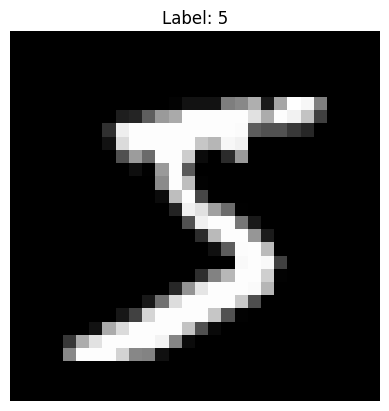

In [30]:
def drawFig(idx):
    plt.imshow(X_reshaped[idx], cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
    plt.show()
    
drawFig(0)

In [19]:
from abc import ABC, abstractmethod

class KernelCanvas(ABC):
    def __init__(self) -> None:
        super().__init__()
        
    @abstractmethod
    def makeKernel(self):
        pass

In [60]:
class RandomKernelCanvas(KernelCanvas):
    def __init__(self, shape : tuple, numberOfKernels : int, bitsByKernel : int = 3, activationDegree : float = 0.07):
        self.numberOfKernels = numberOfKernels
        self.bitsByKernel = bitsByKernel
        self.activationDegree = activationDegree
        self.shape = shape
        super().__init__()
        
        self.makeKernel()
        
    def squareDistance(self, x, y):
        return np.sum(np.pow(x - y, 2))
        
    def makeKernel(self):
        points = np.random.choice(np.prod(self.shape), size=self.numberOfKernels, replace=False)
        self.kernel_points = [(point // self.shape[1], point % self.shape[1]) for point in points]
        
    def showKernelPoints(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)

        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
        
    def findClosestKernel(self, x):
        distances = [self.squareDistance(x, np.array(self.kernel_points[i])) for i in range(self.numberOfKernels)]
        return np.argmin(distances)
        
    def showCanvas(self):
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
        
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        
         # Add numbers to each square
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                ax.text(j, i, str(self.findClosestKernel((i, j))), 
                        va='center', ha='center', color='black', fontsize=6)

        plt.show()
        
    def transform(self, data) -> np.ndarray:
        if data.shape != self.shape:
            raise ValueError(f"Input data shape {data.shape} does not match expected shape {self.shape}")
        
        ret = np.zeros(self.numberOfKernels, dtype=bool)
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kernel_index = self.findClosestKernel((i, j))
                if(data[i, j] > self.activationDegree):
                    ret[kernel_index] = True
        return ret
    
    def showTransformed(self, TransformedData):
        if len(TransformedData) != self.numberOfKernels:
            raise ValueError(f"Transformed data length {len(TransformedData)} does not match number of kernels {self.numberOfKernels}")
        
        canvas = np.ones((*self.shape, 3))  # All white squares, RGB

        
        
        # paint the activated kernels
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if(TransformedData[self.findClosestKernel((i, j))]):
                    canvas[i, j] = [0, 0, 0]

        # Paint the kernel points red
        for row, col in self.kernel_points:
            canvas[row, col] = [1, 0, 0]  # Red color (R=1, G=0, B=0)
            
        fig, ax = plt.subplots()
        ax.imshow(canvas, vmin=0, vmax=1)
        plt.show()
                    
                

In [64]:
tst = RandomKernelCanvas((28, 28), 32, bitsByKernel=3, activationDegree=0.07)
tst.kernel_points

[(np.int64(25), np.int64(5)),
 (np.int64(18), np.int64(18)),
 (np.int64(23), np.int64(12)),
 (np.int64(7), np.int64(24)),
 (np.int64(14), np.int64(8)),
 (np.int64(0), np.int64(16)),
 (np.int64(3), np.int64(27)),
 (np.int64(18), np.int64(20)),
 (np.int64(14), np.int64(3)),
 (np.int64(1), np.int64(6)),
 (np.int64(11), np.int64(9)),
 (np.int64(3), np.int64(2)),
 (np.int64(26), np.int64(13)),
 (np.int64(2), np.int64(1)),
 (np.int64(26), np.int64(12)),
 (np.int64(23), np.int64(8)),
 (np.int64(13), np.int64(0)),
 (np.int64(14), np.int64(12)),
 (np.int64(17), np.int64(23)),
 (np.int64(24), np.int64(21)),
 (np.int64(22), np.int64(3)),
 (np.int64(1), np.int64(4)),
 (np.int64(26), np.int64(0)),
 (np.int64(2), np.int64(15)),
 (np.int64(10), np.int64(6)),
 (np.int64(9), np.int64(0)),
 (np.int64(24), np.int64(9)),
 (np.int64(15), np.int64(24)),
 (np.int64(10), np.int64(7)),
 (np.int64(21), np.int64(23)),
 (np.int64(27), np.int64(15)),
 (np.int64(21), np.int64(22))]

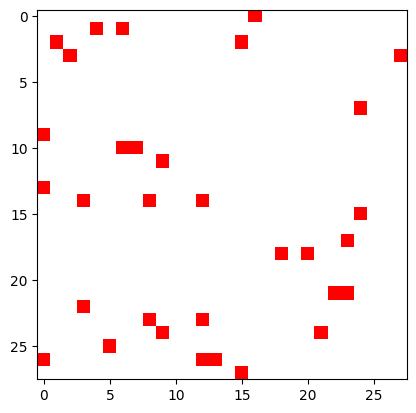

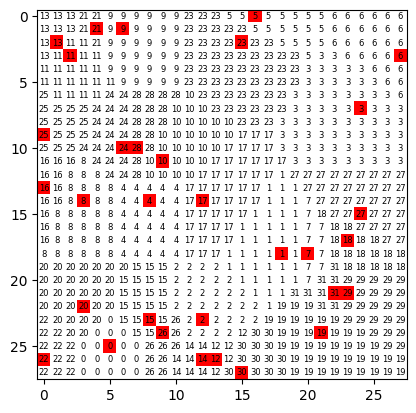

In [65]:
tst.showKernelPoints()
tst.showCanvas()

[ True  True  True  True False False False  True False False  True False
 False False False  True False  True False False  True False False  True
 False False  True False  True False False False]


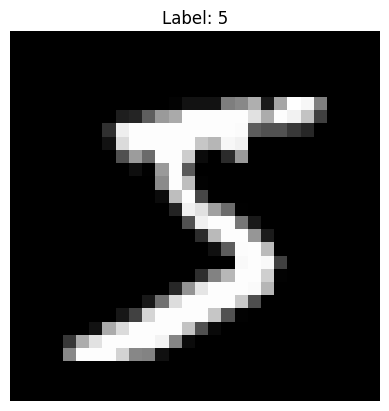

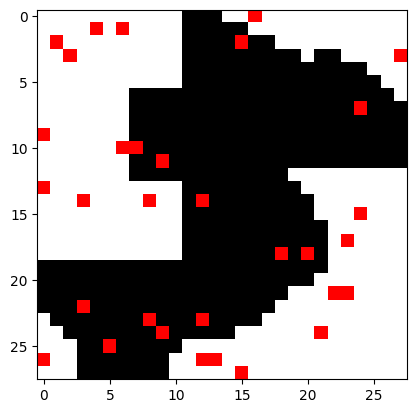

In [66]:
print(tst.transform(X_reshaped[0]))
drawFig(0)
tst.showTransformed(tst.transform(X_reshaped[0]))